# Project 4_ Cluster Analysis
Problem Statement

Problem 1: There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

Problem 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

Problem 3: Identify which all stocks are moving together and which all stocks are different from each other.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df= pd.read_csv('C:/Users/HP/OneDrive/Desktop/ML(Clustering)/data_stocks.csv')

In [7]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [9]:
df.shape

(41266, 502)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [11]:
data_cor = df.copy()
data_cor.drop(['DATE','SP500'],inplace=True,axis=1)

# Question 1:

Which are stocks are apparently similar in nature

In [12]:
# Finding correlation between variables - identify highly correlated variables
cor = data_cor.corr()

In [13]:
cor_dt = pd.DataFrame(data=cor.values, columns=cor.index, index = cor.index)
cor_dt.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,...,0.321414,-0.438662,0.443773,0.347293,-0.463670,0.589464,0.634191,0.418591,-0.201805,0.160213


In [14]:
cor_dt[cor_dt['NASDAQ.AAL'].values > 0.80][:5]

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AMZN,0.803319,0.370111,0.730719,0.386619,0.252712,0.828757,-0.648854,0.059345,0.897693,0.170978,...,0.879967,-0.733852,0.530139,0.804398,-0.203979,0.533584,0.503878,0.793529,0.419472,0.872246
NASDAQ.EXPE,0.812206,0.379622,0.818384,0.218189,0.369697,0.834440,-0.707045,0.296553,0.817588,0.199334,...,0.931258,-0.825230,0.591514,0.859042,-0.368192,0.712184,0.658203,0.883902,0.347660,0.913009
NASDAQ.HAS,0.832713,-0.274890,0.251696,0.252954,-0.030201,0.394658,-0.206013,-0.208923,0.530874,0.258187,...,0.698866,-0.609800,0.035341,0.625126,0.264187,0.306630,0.055201,0.406760,0.839854,0.651842
NYSE.CMI,0.810391,0.088336,0.528227,0.206259,0.179664,0.577301,-0.458993,0.140823,0.690999,0.184153,...,0.803020,-0.677137,0.226787,0.767652,-0.003402,0.521924,0.370814,0.616157,0.581472,0.753369


# Question 2:

How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

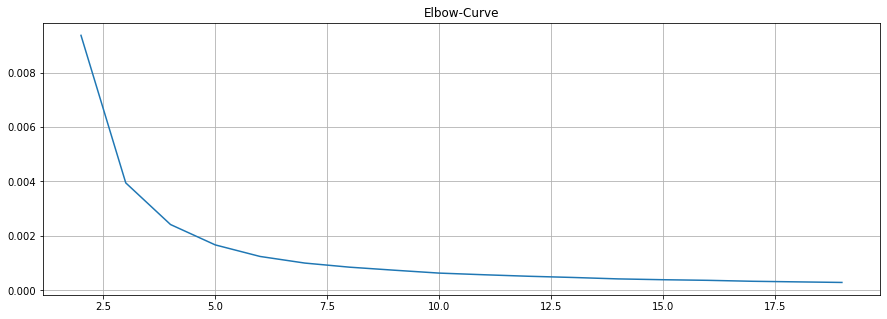

In [17]:
# We will try to find the optimal number of clusters and assign each stock to a specific cluster
# Calculate the average annual percentage return and volatilities over a theoritical one year period

from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

returns = df.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = df.pct_change().std()*sqrt(252)

# format the data into numpy array to feed into K-means algorithm
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

X = dta
distortions =[]
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,5))
plt.plot(range(2,20),distortions)
plt.grid(True)
plt.title('Elbow-Curve')
plt.show()

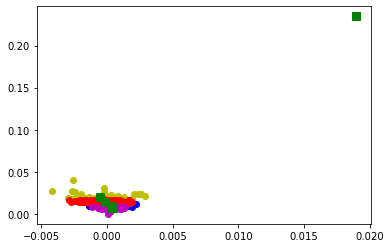

In [18]:
from pylab import plot, show
# Computing kmeans with K =5 (5 clusters)
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

Ok, so it looks like we have an outlier in the data which is skewing the results and making it difficult to actually see what is going on for all the other stocks. Let’s take the easy route and just delete the outlier from our data set and run this again.

In [19]:
#identify the outlier
print(returns.idxmax())

Returns    NYSE.XRX
dtype: object


In [22]:
#drop the relevant stock from our data
df.drop(['NYSE.XRX','DATE','SP500'],inplace=True,axis=1)

returns = df.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = df.pct_change().std()*sqrt(252)

# format the data into numpy array to feed into K-means algorithm
 
#recreate data to feed into the algorithm
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

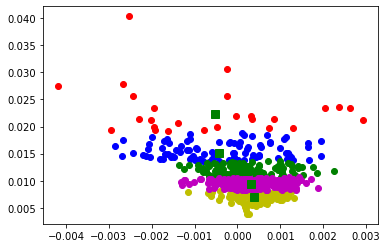

In [23]:
# Computing kmeans with K =5 (5 clusters)
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [24]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
details[:5]
#for detail in details:
#   print(list(detail))

[('NASDAQ.AAL', 0),
 ('NASDAQ.AAPL', 4),
 ('NASDAQ.ADBE', 4),
 ('NASDAQ.ADI', 3),
 ('NASDAQ.ADP', 3)]

So there you have it, we now have a list of each of the stocks in the S&P 500, along with which one of 5 clusters they belong to with the clusters being defined by their return and volatility characteristics. We also have a visual representation of the clusters in chart format.



In [25]:
df1 = pd.DataFrame(details, columns=['Stock_Name','Cluster_No'])
df1.Cluster_No.value_counts()

4    164
3    115
1    105
0     89
2     26
Name: Cluster_No, dtype: int64

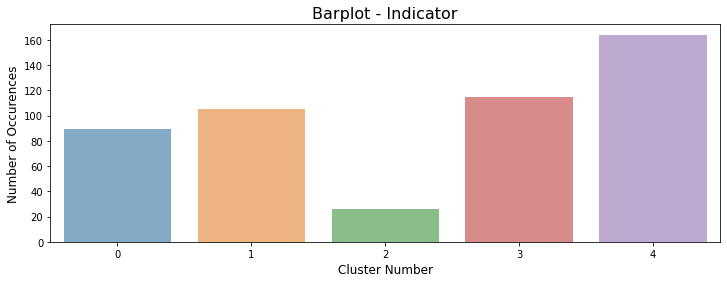

In [26]:
import seaborn as sns
ind = df1.Cluster_No.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=ind.index, y=ind.values, alpha=0.6)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Cluster Number',fontsize=12)
plt.title('Barplot - Indicator',fontsize =16)
plt.show()

# Excercise 3 PCA:

Identify which all stocks are moving together and which all stocks are different from each other.

In [28]:
# Apply PCA to identify the stocks correlated with each other
df.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,34.00,84.370,119.035,44.40,39.88,82.03,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,34.07,84.370,119.035,44.11,39.88,82.03,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,34.11,84.585,119.260,44.09,39.98,82.02,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,33.97,84.460,119.260,44.25,39.99,82.02,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,34.00,84.470,119.610,44.11,39.96,82.03,50.20,63.91,121.695,53.240


In [30]:
dt = df.copy()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# convert data into numpy arrays
X = dt.values

# Scaling the values
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=150)
pca.fit(X_scaled)

# the amount of variance that each PCA explains
var = pca.explained_variance_ratio_

# cumulative varince explains
var1 = np.cumsum(np.round(var, decimals=4)*100)
print(var1)

[46.97 64.24 76.27 81.13 84.93 87.74 89.74 91.05 92.1  92.85 93.53 94.11
 94.58 95.03 95.44 95.79 96.12 96.38 96.61 96.83 97.02 97.18 97.33 97.46
 97.59 97.71 97.82 97.92 98.01 98.09 98.17 98.25 98.32 98.39 98.45 98.51
 98.57 98.62 98.67 98.72 98.76 98.8  98.84 98.88 98.92 98.95 98.98 99.01
 99.04 99.07 99.1  99.13 99.16 99.18 99.2  99.22 99.24 99.26 99.28 99.3
 99.32 99.34 99.36 99.38 99.4  99.42 99.44 99.46 99.47 99.48 99.49 99.5
 99.51 99.52 99.53 99.54 99.55 99.56 99.57 99.58 99.59 99.6  99.61 99.62
 99.63 99.64 99.65 99.66 99.67 99.68 99.69 99.7  99.71 99.72 99.73 99.74
 99.75 99.76 99.77 99.78 99.79 99.8  99.8  99.8  99.8  99.8  99.8  99.8
 99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8
 99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8
 99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8
 99.8  99.8  99.8  99.8  99.8  99.8 ]


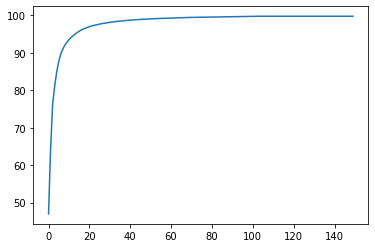

In [31]:
plt.plot(var1)

In [32]:
# Looking at above plot I can consider 25 variables 
pca = PCA(n_components =25)
X1 = pca.fit_transform(X_scaled)
print(X1)

[[ 25.54489969   9.98399845  -9.36306484 ...   0.55854032   0.11220523
    2.41178659]
 [ 25.64396757   9.87058075  -9.78352591 ...   0.46097589   0.19985698
    2.30254613]
 [ 25.55832141   9.80326405  -9.65680691 ...   0.53728302   0.06617852
    2.04748575]
 ...
 [-22.74268953  13.34385803   6.52612773 ...  -2.13667407   1.22332984
   -0.33584182]
 [-22.58678189  13.43459792   6.63993624 ...  -2.12231109   1.22898923
   -0.36249372]
 [-22.69505715  13.37926134   6.56805244 ...  -2.15965068   1.20986097
   -0.3221729 ]]


In [33]:
print('Number of PCA :',len(pca.components_))
print(abs(pca.components_))

Number of PCA : 25
[[0.03932727 0.04119779 0.06302875 ... 0.06260427 0.00257534 0.05182548]
 [0.06427995 0.03397585 0.00193476 ... 0.02032991 0.08130274 0.05943219]
 [0.03996486 0.06394349 0.01187376 ... 0.02086513 0.06626943 0.02349888]
 ...
 [0.01104411 0.00467171 0.00479884 ... 0.01181536 0.04409943 0.01146294]
 [0.07461077 0.01895749 0.01012627 ... 0.00151619 0.01851276 0.04851859]
 [0.02259646 0.03311657 0.03678271 ... 0.00429837 0.02061178 0.02450541]]


In [34]:
comp = pd.DataFrame(pca.components_, columns = dt.columns)
comp.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.039327,-0.041198,-0.063029,-0.009854,-0.035888,-0.054813,0.050489,-0.035384,-0.044205,-0.014613,...,0.044324,-0.049520,0.057072,-0.054750,-0.050685,0.047282,-0.061482,-0.062604,0.002575,-0.051825
1,-0.064280,0.033976,0.001935,-0.032403,0.043516,-0.029425,0.016081,0.058270,-0.052583,0.012303,...,-0.022112,-0.058897,0.030257,0.013746,-0.040753,-0.052867,0.031522,-0.020330,-0.081303,-0.059432
2,-0.039965,0.063943,0.011874,0.043297,-0.037457,0.040367,-0.053789,-0.051299,0.030592,-0.086503,...,-0.046046,-0.003326,0.022205,0.059502,-0.034738,-0.028530,-0.004580,0.020865,-0.066269,0.023499
3,0.007225,0.077156,0.008401,-0.028080,-0.018027,0.008762,-0.032382,0.034501,0.051270,-0.078063,...,-0.054202,0.021500,0.061063,-0.039785,0.027499,0.012080,0.002698,-0.002802,-0.049638,0.015167
4,-0.033182,-0.017369,0.002557,-0.038106,-0.101883,-0.034799,-0.010965,0.037455,-0.039823,-0.013665,...,-0.081522,-0.036786,-0.011903,-0.030101,-0.012076,-0.045974,-0.002891,-0.001254,-0.003203,0.005309
